In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
train_df = pd.read_csv("/content/Train.csv")
test_df = pd.read_csv("/content/Test.csv")


print(train_df.shape)
train_df.head()


(8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
train_df.describe()


,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [5]:
train_df.isnull().sum()


,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [6]:
df = train_df.copy()

# Drop ID and known label (Segmentation)
df.drop(columns=['ID', 'Segmentation'], inplace=True)

df.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [7]:
num_cols = ['Age', 'Work_Experience', 'Family_Size']
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']


In [20]:
# Numerical → median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical → mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [21]:
train_df.isnull().sum()


,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [22]:
df.isnull().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   int64  
 1   Ever_Married     8068 non-null   int64  
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   int64  
 4   Profession       8068 non-null   int64  
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   int64  
 7   Family_Size      8068 non-null   float64
 8   Var_1            8068 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 567.4 KB


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [24]:
import numpy as np
np.isnan(X_scaled).sum()


np.int64(0)

In [25]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


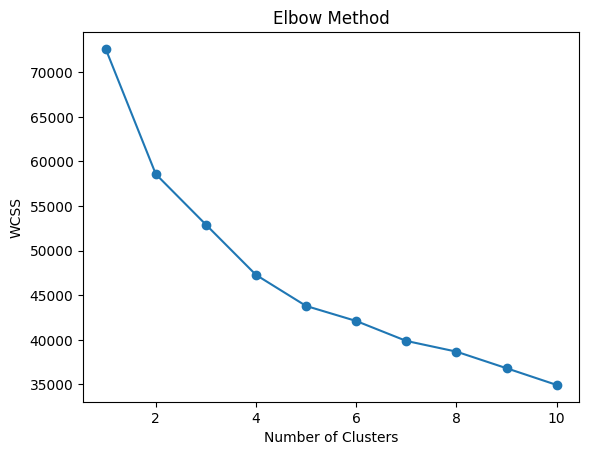

In [26]:
import matplotlib.pyplot as plt

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df['Cluster'].value_counts()


,count
Cluster,
0,2522
3,2257
1,1991
2,1298


In [28]:
cluster_summary = df.groupby('Cluster').mean()
cluster_summary


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
Cluster,,,,,,,,,
0,0.585250,1.032910,46.552339,0.771610,1.520222,2.394528,0.263680,3.211340,4.161776
1,0.556504,0.112004,27.331492,0.176796,4.325465,2.296836,1.966851,3.992466,3.656956
2,0.645609,0.987673,68.229584,0.586287,5.561633,1.159476,1.463020,2.117874,4.596302
3,0.440851,0.360213,40.011963,0.914931,1.600798,3.471422,1.990253,1.882144,4.373062


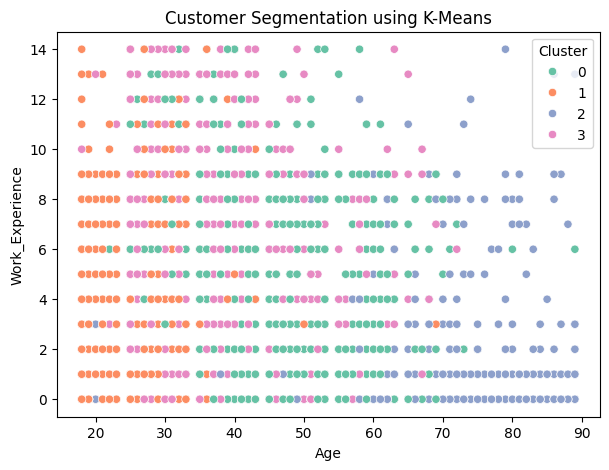

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df['Age'],
    y=df['Work_Experience'],
    hue=df['Cluster'],
    palette='Set2'
)
plt.title("Customer Segmentation using K-Means")
plt.show()
